In [1]:
#Kagle é um site que possui unumeras bases de dados para estudos de data science - https://www.kaggle.com/
#Para essse estudo vamos utilizaar a base de dados Emergency 911
#Voce pode fazer o download dessa base de dados atpós fazer o seu login no site

In [2]:
#Como importar bibliotecas numpy e pandas?

import numpy as np
import pandas as pd

In [3]:
#Importe as bibliotecas de visualização e configure o matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df911 = pd.read_csv("E:\Estudos\DataScience-MachineLearning\kaggle - bases de dados\911.csv")
df911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [8]:
#Desrição das variaveis 
#lat = latitude
#lng = longitude
#des = chamda de emergencia
#zip = codigo codigo postal /cep
#titulo - titulo
#timeStamp = data/hora
#twp = municipio/cidade
#addr = endereço
#e = dummy /sempre 1

In [9]:
#Cheque o cabeçalho do arquivo
df911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
#Quais os 5 zipcodes mais frequentes do arquivo?
df911['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [14]:
#Quais as 5 cidades mais frequentes?

df911['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [18]:
#Quantos titulos esclusivos existem (que nao se repete)?
len(df911['title'].unique())

# ou
# df911['title'].nunique()

148

In [19]:
#Crie uma nova coluna onde receba somente o departamento que recebeu a ligação
#a informação esta contida na variavel title, sendo elas: EMS, Traffic, Fire
#ao separar o motivo da ligação do departamento, atribua os valores a uma coluna chamada REASON
#use .apply para modificar o dataframe original

df911['Reason'] = df911['title'].apply(lambda title: title.split(':')[0])
df911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


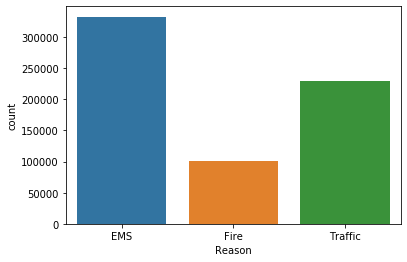

In [22]:
#Use o seanborn countplots para verificar o grafico de principais ocorrencias da coluna Reason

sns.countplot(x='Reason', data=df911)

In [23]:
#Voce deve ter notado que a coluna TIMESTAMP é uma string, converta-a usando o pd.to_datetime para que 
#seja possivel trabalhar com data e hora

df911['timeStamp'] = pd.to_datetime(df911['timeStamp'])


In [27]:
df911['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [28]:
df911['timeStamp'].iloc[1]

Timestamp('2015-12-10 17:29:21')

In [29]:
#agora crie novas colunas para hora, mes e dia da semana usando a funação time, apply e lambda
df911['Hour'] = df911['timeStamp'].apply(lambda time: time.hour)
df911['Month'] = df911['timeStamp'].apply(lambda time: time.month)
df911['Day of Week'] = df911['timeStamp'].apply(lambda time: time.dayofweek)

In [30]:
df911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [31]:
#Agora use o .map criar um dicionario e nomear o dia da semana em str = domingo, segunda...

dmap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df911['Day of Week'] = df911['Day of Week'].map(dmap)

In [33]:
df911['Day of Week'].value_counts()

Friday       102942
Wednesday     99157
Thursday      98683
Tuesday       97684
Monday        96745
Saturday      89452
Sunday        78859
Name: Day of Week, dtype: int64

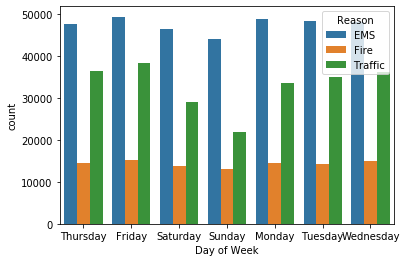

In [35]:
#Crie um grafico usando seaborn countplot em que o dia da semana estabelaça uma co-relação com a razão da ligação

sns.countplot(x='Day of Week', data=df911, hue='Reason')

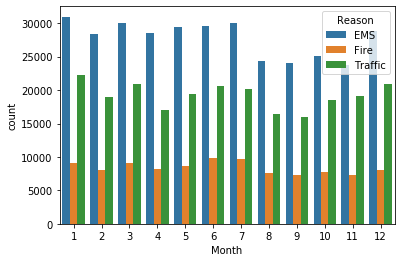

In [36]:
#Faça o mesmo para os meses do ano

sns.countplot(x='Month', data=df911, hue='Reason')

In [39]:
# Criar um GroupBy para reunir as informações de cada mês

dfMes = df911.groupby('Month').count()
dfMes.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


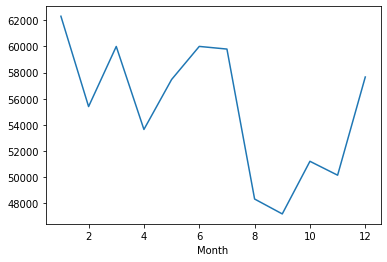

In [40]:
#Crie um plot simples para para os indices de ligação para o 911 por mes

dfMes['twp'].plot()

In [42]:
#quando criamos o dataframe baseado nos meses, o Mes passou a ser um indice ao invez de coluna
#agora, reset/redefina o mes como uma coluna para criar um grafico linear no seaborn - lmplot

dfMesReset = dfMes.reset_index()
dfMesReset.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


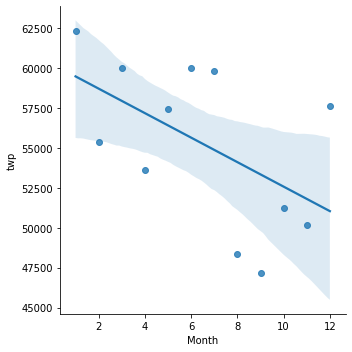

In [44]:
sns.lmplot(x='Month', y='twp', data=dfMesReset)

In [45]:
#Agora crie uma coluna baseado em datas da coluna timeStamp

df911['Data'] = df911['timeStamp'].apply(lambda x: x.date())
df911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Data
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thursday,2015-12-10


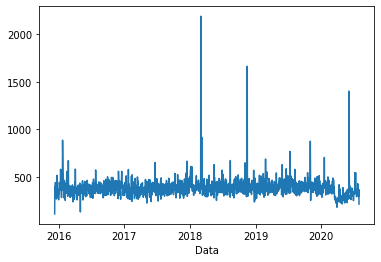

In [48]:
#Use um groupby paara reunir as informações baseado em suas data e gere um grafico com o numero de chamadas para 911 por cidade
#e plot em um grafico simples todas essas informações

df911.groupby('Data').count()['twp'].plot()

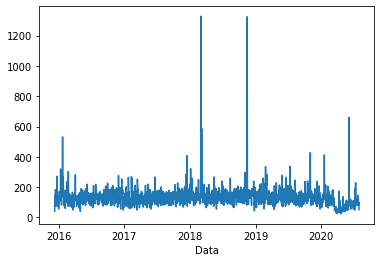

In [54]:
#Usando as informações acima, crie 3 graficos diferentes onde as informações estejam separadas por REASON

df911[df911['Reason'] == 'Traffic'].groupby('Data').count()['twp'].plot()

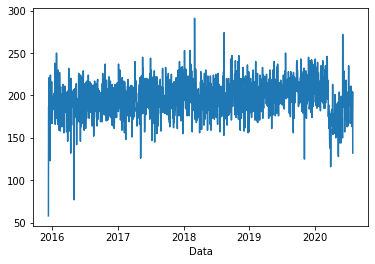

In [51]:
df911[df911['Reason'] == 'EMS'].groupby('Data').count()['twp'].plot()

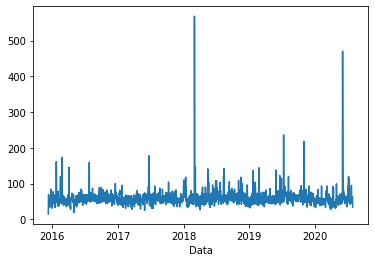

In [53]:
df911[df911['Reason'] == 'Fire'].groupby('Data').count()['twp'].plot()

In [59]:
#Criar um dataframe agrupando em horas do 17/ dias das semana
# as colunas serão as horas do dia
# os indices os dias da semana
# use o UNSTACK para transformar as horas em colunas 


dfHour911 = df911.groupby(by=['Day of Week', 'Hour']).count()['twp'].unstack()
dfHour911

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,1981,1632,1449,1296,1338,1638,2663,4138,5017,5288,...,6392,7038,7064,7112,5667,5055,4373,3912,3421,2828
Monday,1893,1567,1366,1271,1336,1843,2675,4428,5502,5722,...,5713,6289,6341,6407,5440,4488,3823,3252,2654,2069
Saturday,2442,2058,1879,1588,1449,1579,1879,2488,3457,4312,...,5420,5181,5210,5211,4979,4748,4125,3893,3224,2961
Sunday,2423,2132,1938,1614,1468,1487,1725,2404,3001,3728,...,4744,4475,4559,4505,4402,4133,3747,3158,2627,2321
Thursday,1731,1407,1424,1234,1292,1774,2814,4431,5296,5411,...,6078,6493,6374,6933,5510,4701,4043,3490,2844,2351
Tuesday,1719,1455,1322,1212,1245,1741,2782,4425,5633,5562,...,5923,6251,6494,6877,5625,4618,3843,3408,2706,2133
Wednesday,1662,1481,1258,1262,1128,1609,2667,4643,5465,5443,...,6068,6532,6743,7061,5690,4684,4113,3530,2825,2204


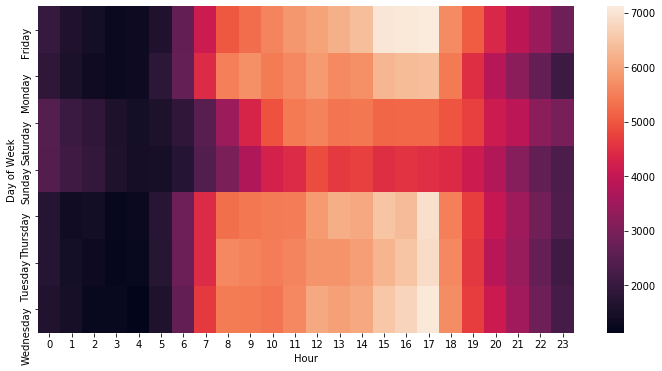

In [61]:
#Crie um mapa de calor com o dataframe dfHour911

plt.figure(figsize=(12,6))
sns.heatmap(dfHour911)

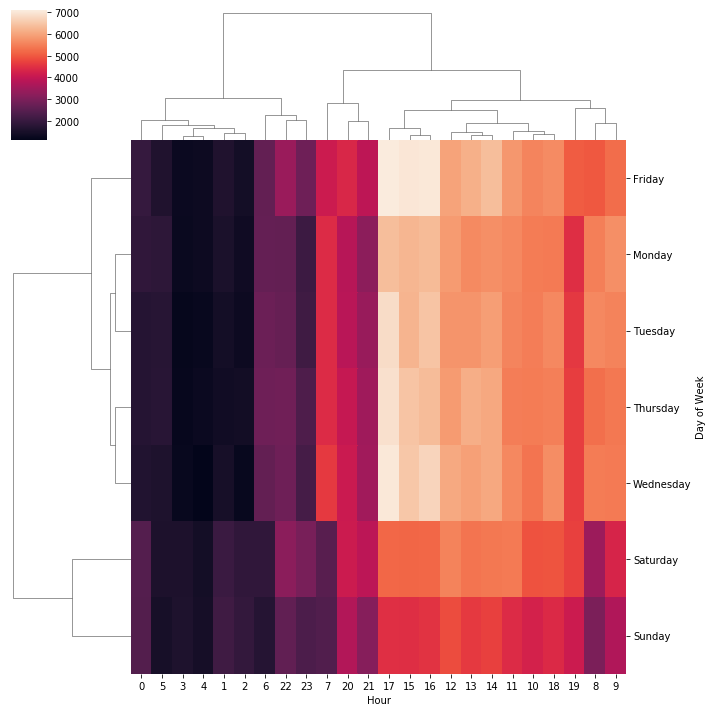

In [63]:
sns.clustermap(dfHour911)

In [64]:
#Replique os codigos acima, trocando a hora por mes

dfMonth911 = df911.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()
dfMonth911

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Friday,9305,8251,10932,7995,8899,9202,8677,7332,7689,6931,8379,9303
Monday,8894,8743,8057,8407,7876,8510,9496,6853,6598,8068,6716,8489
Saturday,8467,7589,8043,7511,7221,8195,7745,6108,6563,6607,6767,8588
Sunday,7476,6450,6763,6862,6688,6832,7854,5272,5955,6315,5194,7162
Thursday,9053,7995,8849,7721,8736,9486,8376,7502,6952,7482,8353,8147
Tuesday,9711,8083,8370,7561,9020,8340,9078,7289,6597,7946,7341,8301
Wednesday,9406,8294,8987,7598,9034,9440,8576,7979,6842,7871,7407,7677


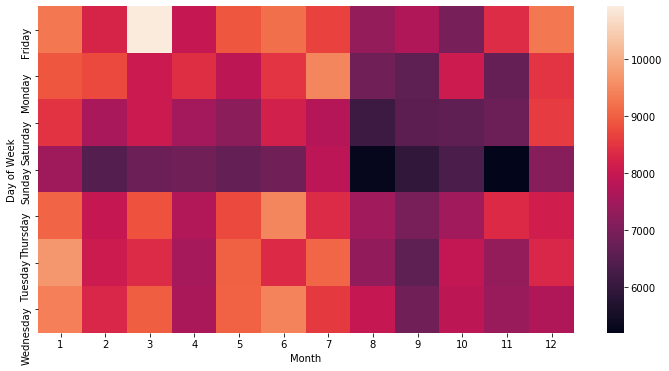

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(dfMonth911)

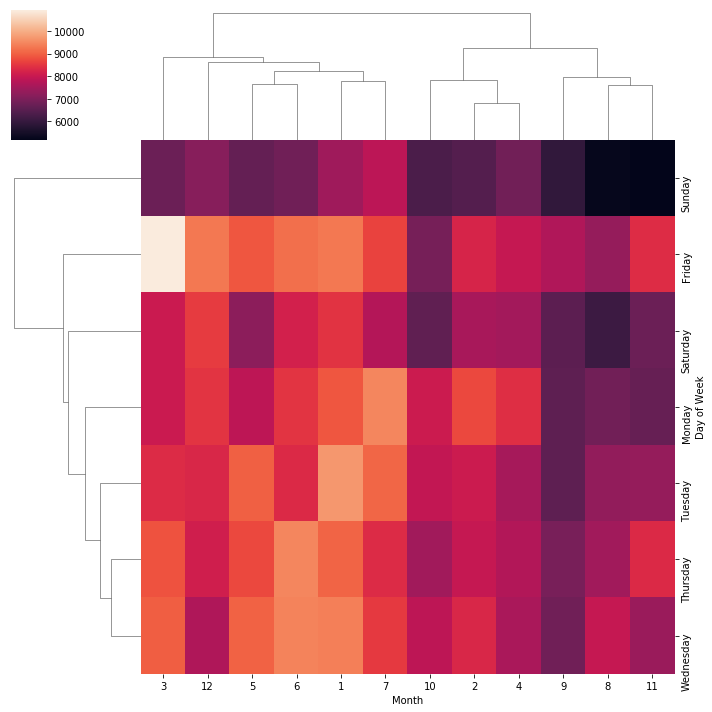

In [66]:
sns.clustermap(dfMonth911)